<a href="https://colab.research.google.com/github/noobhacker02/Real-estate-price-prediction-15/blob/main/Miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as mp
import numpy as np
%matplotlib inline
matplotlib.rcParams["figure.figsize"] =(20,10)
from ipywidgets.widgets import Label,Button
from ipywidgets.widgets import Layout, HBox, VBox
from IPython.display import display



In [169]:
data = pd.read_csv("Mumbai1.csv")

In [170]:
data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [171]:
data.shape

(6347, 19)

In [172]:
data.groupby("Area")['Area'].agg('count')

Area
200     2
216     1
220     3
225     6
239     1
       ..
6381    1
6900    1
7000    1
7600    1
8511    1
Name: Area, Length: 1140, dtype: int64

In [173]:
data.groupby("Car Parking")['Car Parking'].agg('count')

Car Parking
0    2774
1    3573
Name: Car Parking, dtype: int64

In [174]:
data.groupby("Landscaped Gardens")['Landscaped Gardens'].agg('count')

Landscaped Gardens
0    4058
1    2289
Name: Landscaped Gardens, dtype: int64

In [175]:
data.groupby("Swimming Pool")['Swimming Pool'].agg('count')

Swimming Pool
0    3438
1    2909
Name: Swimming Pool, dtype: int64

In [176]:
new_data_1 = data.drop(["Gymnasium","Intercom","Indoor Games","Jogging Track","Clubhouse","Gas Connection","Unnamed: 0","24x7 Security","Maintenance Staff","Landscaped Gardens","Swimming Pool","New/Resale"],axis='columns')
new_data_1.sample(5)

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking,Children's Play Area
3790,9000000,1050,Mira Road East,2,1,0,1
4467,6000000,700,Thane West,1,1,0,1
4997,15900000,798,Thane West,2,1,0,0
4876,15500000,1023,Malad East,2,1,0,0
2553,30000000,1180,Vikhroli,2,1,0,1


In [177]:
new_data = new_data_1.drop(["Children's Play Area"],axis='columns')
new_data.sample(5)

,Price,Area,Location,No. of Bedrooms,Lift Available,Car Parking
2438,35000000,1000,Prabhadevi,2,1,1
5255,5990000,901,Thane West,2,1,1
261,8000000,650,Dahisar W,1,0,1
790,21000000,900,Soniwadi Road,2,0,0
5729,2150000,525,Nala Sopara,1,1,0


In [178]:
#data cleaning
new_data.isnull().sum()

Price              0
Area               0
Location           0
No. of Bedrooms    0
Lift Available     0
Car Parking        0
dtype: int64

In [179]:
new_data.duplicated().sum()

240

In [180]:
new_data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Lift Available',
       'Car Parking'],
      dtype='object')

In [181]:
new_data.rename(columns = {'No. of Bedrooms':'bhk'}, inplace= True)

In [182]:
new_data.rename(columns = {'Lift Available':'Lift'}, inplace= True)

In [183]:
new_data.rename(columns = {'Car Parking':'Parking'}, inplace= True)

In [184]:
new_data.rename(columns = {"Children's Play Area":'PlayArea'}, inplace= True)

In [185]:
new_data[new_data.bhk>10]

,Price,Area,Location,bhk,Lift,Parking


In [186]:
new_data.Area.unique()

array([ 720,  600,  650, ...,  250, 1162,  435])

In [187]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [188]:
new_data['price_per_sqft'] = new_data['Price']/new_data['Area']

In [189]:
new_data[~new_data['price_per_sqft'].apply(is_float)].head(10)

,Price,Area,Location,bhk,Lift,Parking,price_per_sqft


In [190]:
new_data.head(10)

,Price,Area,Location,bhk,Lift,Parking,price_per_sqft
0,4850000,720,Kharghar,1,1,1,6736.111111
1,4500000,600,Kharghar,1,1,1,7500.000000
2,6700000,650,Kharghar,1,1,1,10307.692308
3,4500000,650,Kharghar,1,1,1,6923.076923
4,5000000,665,Kharghar,1,1,1,7518.796992
5,17000000,2000,Kharghar,4,1,1,8500.000000
6,12500000,1550,Kharghar,3,1,1,8064.516129
7,10500000,1370,Sector-13 Kharghar,3,1,1,7664.233577
8,10500000,1356,Kharghar,3,1,1,7743.362832
9,15000000,1680,Kharghar,3,1,1,8928.571429


In [191]:
len(new_data.Location.unique())

413

In [192]:
new_data[new_data.Area/new_data.bhk<300].head()

,Price,Area,Location,bhk,Lift,Parking,price_per_sqft
239,11200000,573,Ulwe,2,1,1,19546.247818
503,4000000,568,Bhiwandi,2,1,1,7042.253521
545,6600000,550,Thane,2,1,1,12000.000000
546,6900000,565,Thane,2,1,1,12212.389381
547,6800000,547,Thane,2,1,1,12431.444241


In [193]:
new_data.price_per_sqft.describe()

count      6347.000000
mean      13555.465839
std        9573.921483
min        1597.444089
25%        7234.042553
50%       10493.827160
75%       17142.857143
max      109950.522265
Name: price_per_sqft, dtype: float64

In [194]:
def remove_outliers(data):
  df_out = pd.DataFrame()
  for key, subdf in data.groupby('Location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

In [195]:
data_1 = remove_outliers(new_data)

In [196]:
from sklearn.preprocessing import LabelEncoder
location = LabelEncoder()
data_1['location_n'] = location.fit_transform(data_1['Location'])
data_1

,Price,Area,Location,bhk,Lift,Parking,price_per_sqft,location_n
0,6200000,400,Airoli,1,1,1,15500.000000,0
1,9500000,1000,Airoli,2,1,1,9500.000000,0
2,14900000,1245,Airoli,2,1,1,11967.871486,0
3,14000000,1183,Airoli,2,1,1,11834.319527,0
4,14800000,1245,Airoli,2,1,1,11887.550201,0
...,...,...,...,...,...,...,...,...
4612,11500000,1065,vasant vihar thane west,2,1,1,10798.122066,230
4613,47500000,1509,vile parle west,3,1,0,31477.799867,231
4614,33500000,1073,vile parle west,2,1,0,31220.876048,231
4615,58000000,1735,vile parle west,3,0,0,33429.394813,231


In [197]:
data_1.to_csv("New_Dataset.csv",index=False)

In [198]:
data_1.shape

(4617, 8)

In [199]:
data_1.head()

,Price,Area,Location,bhk,Lift,Parking,price_per_sqft,location_n
0,6200000,400,Airoli,1,1,1,15500.000000,0
1,9500000,1000,Airoli,2,1,1,9500.000000,0
2,14900000,1245,Airoli,2,1,1,11967.871486,0
3,14000000,1183,Airoli,2,1,1,11834.319527,0
4,14800000,1245,Airoli,2,1,1,11887.550201,0


In [200]:
data_1.isnull().sum()

Price             0
Area              0
Location          0
bhk               0
Lift              0
Parking           0
price_per_sqft    0
location_n        0
dtype: int64

In [201]:
data_1.Location = data_1.Location.apply(lambda x: x.strip())
location_stats = data_1['Location'].value_counts(ascending=False)
location_stats

Kharghar           399
Thane West         361
Mira Road East     326
Ulwe               242
Kalyan West        137
                  ... 
MHADA Colony 20      1
Tolaram Colony       1
Link Road            1
Uran                 1
Hanuman Nagar        1
Name: Location, Length: 232, dtype: int64

In [202]:
location_stats.values.sum()

4617

In [203]:
len(location_stats[location_stats>10])

76

In [204]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Khar West          10
Vashi               9
Nalasopara East     9
Andheri             9
Sion                9
                   ..
MHADA Colony 20     1
Tolaram Colony      1
Link Road           1
Uran                1
Hanuman Nagar       1
Name: Location, Length: 156, dtype: int64

In [205]:
data_1.Location = data_1.Location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data_1.Location.unique())

77

In [206]:
data_1.head()

,Price,Area,Location,bhk,Lift,Parking,price_per_sqft,location_n
0,6200000,400,Airoli,1,1,1,15500.000000,0
1,9500000,1000,Airoli,2,1,1,9500.000000,0
2,14900000,1245,Airoli,2,1,1,11967.871486,0
3,14000000,1183,Airoli,2,1,1,11834.319527,0
4,14800000,1245,Airoli,2,1,1,11887.550201,0


In [207]:
def plot_scatter_chart(df,Location):
  bhk1 = df[(df.Location==Location)&(df.bhk==1)]
  bhk2 = df[(df.Location==Location)&(df.bhk==2)]
  bhk3 = df[(df.Location==Location)&(df.bhk==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  mp.scatter(bhk1.Area,bhk1.Price,marker='*',color='green',label='1 BHK', s=100)
  mp.scatter(bhk2.Area,bhk2.Price,color='blue',label='2 BHK', s=100)
  mp.scatter(bhk3.Area,bhk3.Price,marker='+',color='red',label='3 BHK', s=100)
  mp.xlabel("Total square Feet Area")
  mp.ylabel("Price")
  mp.title(Location)
  mp.legend()

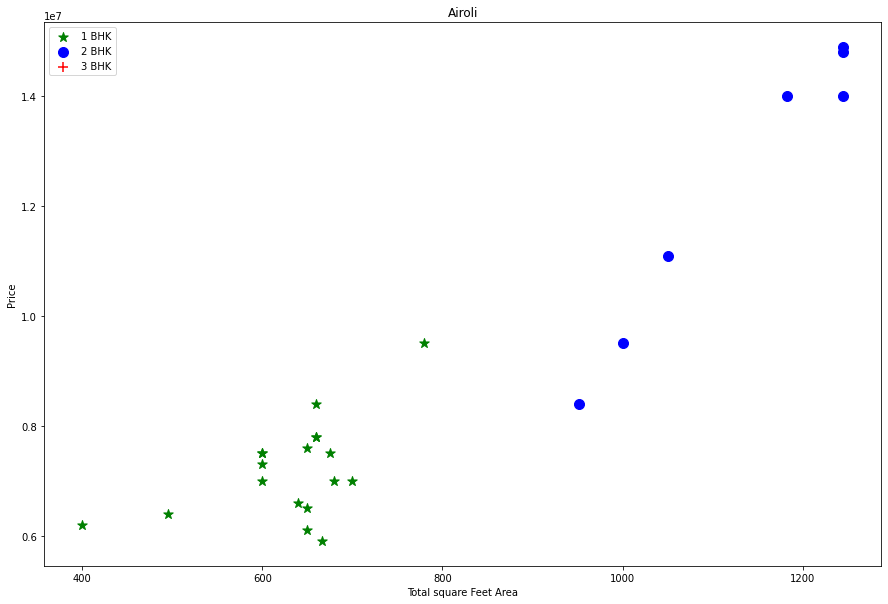

In [208]:
plot = plot_scatter_chart(data_1,"Airoli")

In [209]:
def remove_bhk_outliers(data):
  exclude_indices = np.array([])
  for Location, Location_data in data.groupby('Location'):
    bhk_stats= {}
    for bhk, bhk_data in data.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_data.price_per_sqft),
          'std' : np.std(bhk_data.price_per_sqft),
          'count': bhk_data.shape[0]
      }
      for bhk,bhk_data in Location_data.groupby('bhk'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
          exclude_indices = np.append(exclude_indices,bhk_data[bhk_data.price_per_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')

In [210]:
data_1 = remove_bhk_outliers(data_1)

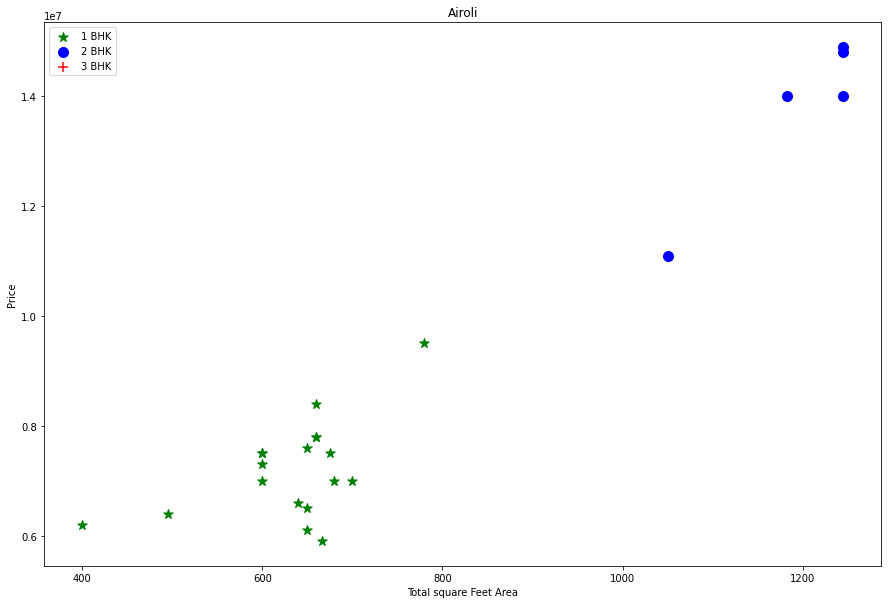

In [211]:
plot = plot_scatter_chart(data_1,"Airoli")

Text(0, 0.5, 'Count')

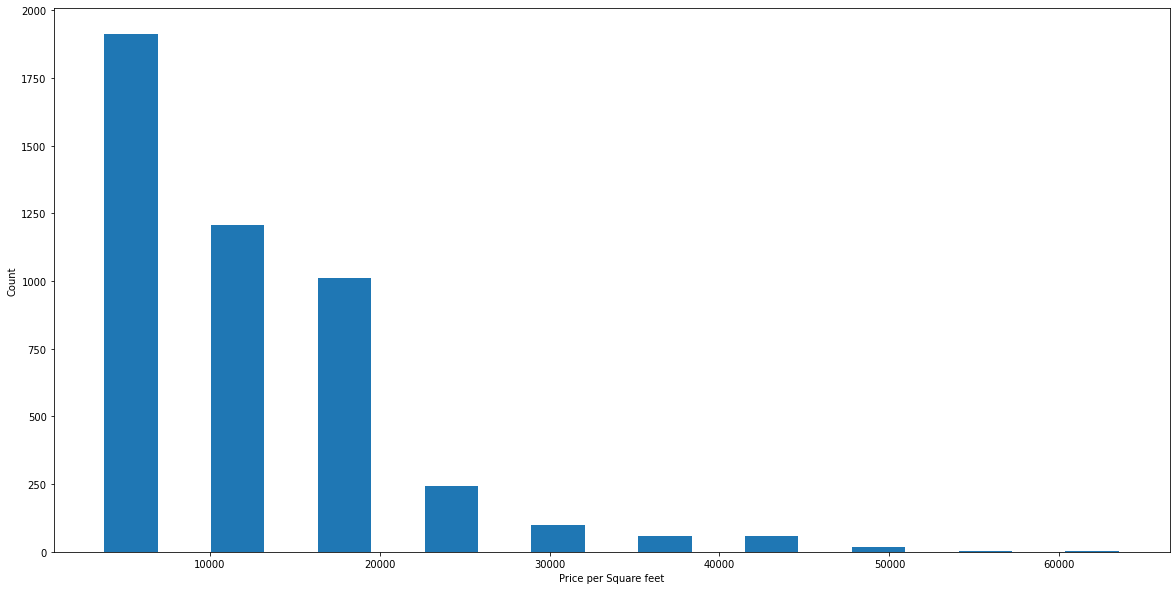

In [212]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
mp.hist(data_1.price_per_sqft,rwidth=0.5)
mp.xlabel("Price per Square feet")
mp.ylabel("Count")

In [213]:
dummies = pd.get_dummies(data_1.Location)
dummies.head(3)

,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,Badlapur East,Bandra East,Bandra West,Belapur,Bhandup West,...,Vasai,Vasai West,Vasai east,Ville Parle East,Virar,Virar West,Wadala,Worli,mumbai,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
data_2 = pd.concat([data_1,dummies],axis='columns')
data_2.head()

,Price,Area,Location,bhk,Lift,Parking,price_per_sqft,location_n,Airoli,Ambernath East,...,Vasai,Vasai West,Vasai east,Ville Parle East,Virar,Virar West,Wadala,Worli,mumbai,other
0,6200000,400,Airoli,1,1,1,15500.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14900000,1245,Airoli,2,1,1,11967.871486,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,14000000,1183,Airoli,2,1,1,11834.319527,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,14800000,1245,Airoli,2,1,1,11887.550201,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,6400000,495,Airoli,1,0,0,12929.292929,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
data_2 = data_2.drop(['Location','price_per_sqft'],axis='columns')


In [216]:
data_2.head()

,Price,Area,bhk,Lift,Parking,location_n,Airoli,Ambernath East,Ambernath West,Andheri East,...,Vasai,Vasai West,Vasai east,Ville Parle East,Virar,Virar West,Wadala,Worli,mumbai,other
0,6200000,400,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14900000,1245,2,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14000000,1183,2,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14800000,1245,2,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6400000,495,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
data_2.shape

(4615, 83)

In [218]:
X = data_2.drop('Price',axis='columns')

In [219]:
X.head()

,Area,bhk,Lift,Parking,location_n,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,...,Vasai,Vasai West,Vasai east,Ville Parle East,Virar,Virar West,Wadala,Worli,mumbai,other
0,400,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1245,2,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1183,2,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1245,2,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,495,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
y = data_2.Price
y.head()

0     6200000
2    14900000
3    14000000
4    14800000
5     6400000
Name: Price, dtype: int64

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3,shuffle = True)

In [222]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7687155649933639

In [223]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=3)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.76871556, 0.7684701 , 0.74264889, 0.70155939, 0.66164835])

In [224]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

In [225]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
  algos = {
      'linear_regression':{
          'model': LinearRegression(),
          'params':{
              'normalize':[True,False]
          }
      },
      
      'lasso':{
          'model': Lasso(),
          'params':{
              'alpha':[1,2],
              'selection':['random','cyclic']
          }
      },

      'decision_tree':{
          'model':DecisionTreeRegressor(),
          'params':{
              'criterion': ['mse','friedman_mse'],
              'splitter' : ['best','random']
          }
      }
  }
  scores= []
  cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state= 0)
  for algo_name,config in algos.items():
    gs = GridSearchCV(config['model'],config['params'],cv = cv, return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,0.769624,{'normalize': False}
1,lasso,0.769624,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.776491,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [226]:
X.columns

Index(['Area', 'bhk', 'Lift', 'Parking', 'location_n', 'Airoli',
       'Ambernath East', 'Ambernath West', 'Andheri East', 'Andheri West',
       'Badlapur East', 'Bandra East', 'Bandra West', 'Belapur',
       'Bhandup West', 'Bhayandar East', 'Bhiwandi', 'Boisar', 'Borivali East',
       'Borivali West', 'Chembur', 'Chembur East', 'Dahisar', 'Dahisar East',
       'Dahisar West', 'Dattapada', 'Dombivali', 'Dombivali East',
       'Dombivli (West)', 'Dronagiri', 'Ghansoli', 'Ghatkopar West',
       'Goregaon', 'Goregaon East', 'Goregaon West', 'Jogeshwari West', 'Juhu',
       'Kalwa', 'Kalyan West', 'Kamothe', 'Kandivali East', 'Kandivali West',
       'Kanjurmarg', 'Karanjade', 'Kharghar', 'Koper Khairane', 'Koproli',
       'Kurla', 'Magathane', 'Malad East', 'Malad West', 'Mira Road East',
       'Mira Road and Beyond', 'Mulund East', 'Mulund West', 'Naigaon East',
       'Nala Sopara', 'Nalasopara West', 'Nerul', 'Panvel', 'Parel', 'Powai',
       'Sanpada', 'Santacruz East', 'S

In [227]:
def predict(Location,Area,bhk,Lift,Parking):
  loc_index = np.where(X.columns==Location)[0][0]
  

  x = np.zeros(len(X.columns))
  x[0] = Area
  x[1] = bhk
  x[2] = Lift
  x[3] = Parking
  if loc_index >=0:
    x[loc_index] = 1
  return lr_clf.predict([x])[0]

In [228]:
predict('Dombivali',720,1,0,1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


3078711.25

In [229]:
predict('Andheri East',700,2,1,0)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


10396272.0

In [230]:
import pickle
with open("Price_prediction_model.pickle","wb") as f:
    pickle.dump(lr_clf,f)

In [231]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [232]:
import joblib
joblib.dump(lr_clf,'price_predict_model.pkl')

['price_predict_model.pkl']

In [233]:
# !pip install streamlit

In [244]:
%%writefile file.py

import streamlit as st
st.title("Real Estate Price Prediction")
st.subheader("Price Predictor")
with st.form(key='form1'):
  L = st.text_input("Location Name")
  A = st.text_input("Enter Area(sq.Feet)")
  b = st.number_input("Enter No. of Bedrooms",1,6)
  L = st.number_input("Put 1 if lift is available or else put 0",0,1)
  P = st.number_input("Put 1 if Parking is available or else put 0",0,1)
  Submit = st.form_submit_button("Submit")


if Submit:
  Output = st.text_input(predict(L,A,b,L,P))


Overwriting file.py


In [235]:
# !pip install pyngrok

In [236]:
from pyngrok import ngrok

In [237]:
ngrok.set_auth_token("Your Token Here")

In [238]:
! nohup streamlit run file.py --server.port 80 & url = ngrok.connect(port = '80')
print(url)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: ` nohup streamlit run file.py --server.port 80 & url = ngrok.connect(port = '80')'
NgrokTunnel: "http://f27b-35-243-145-214.ngrok.io" -> "http://localhost:80"


In [239]:
tunnels = ngrok.get_tunnels()
tunnels

[<NgrokTunnel: "http://f27b-35-243-145-214.ngrok.io" -> "http://localhost:80">,
 <NgrokTunnel: "https://4e1b-35-243-145-214.ngrok.io" -> "http://localhost:80">,
 <NgrokTunnel: "https://ee01-35-243-145-214.ngrok.io" -> "http://localhost:80">,
 <NgrokTunnel: "https://f27b-35-243-145-214.ngrok.io" -> "http://localhost:80">]

In [240]:
def main():
  st.title("Real Estate Price Prediction")
  st.pubheader("Price Predictor")
  with st.form(key='form1'):
    Location = st.text_input("Location Name")
    Area = st.text_input("Enter Area(sq.Feet)")
    bhk = st.text_input("Enter No. of Bedrooms")
    Lift = st.text_input("Put 1 if lift is available or else put 0")
    Parking = st.text_input("Put 1 if Parking is available or else put 0")
    